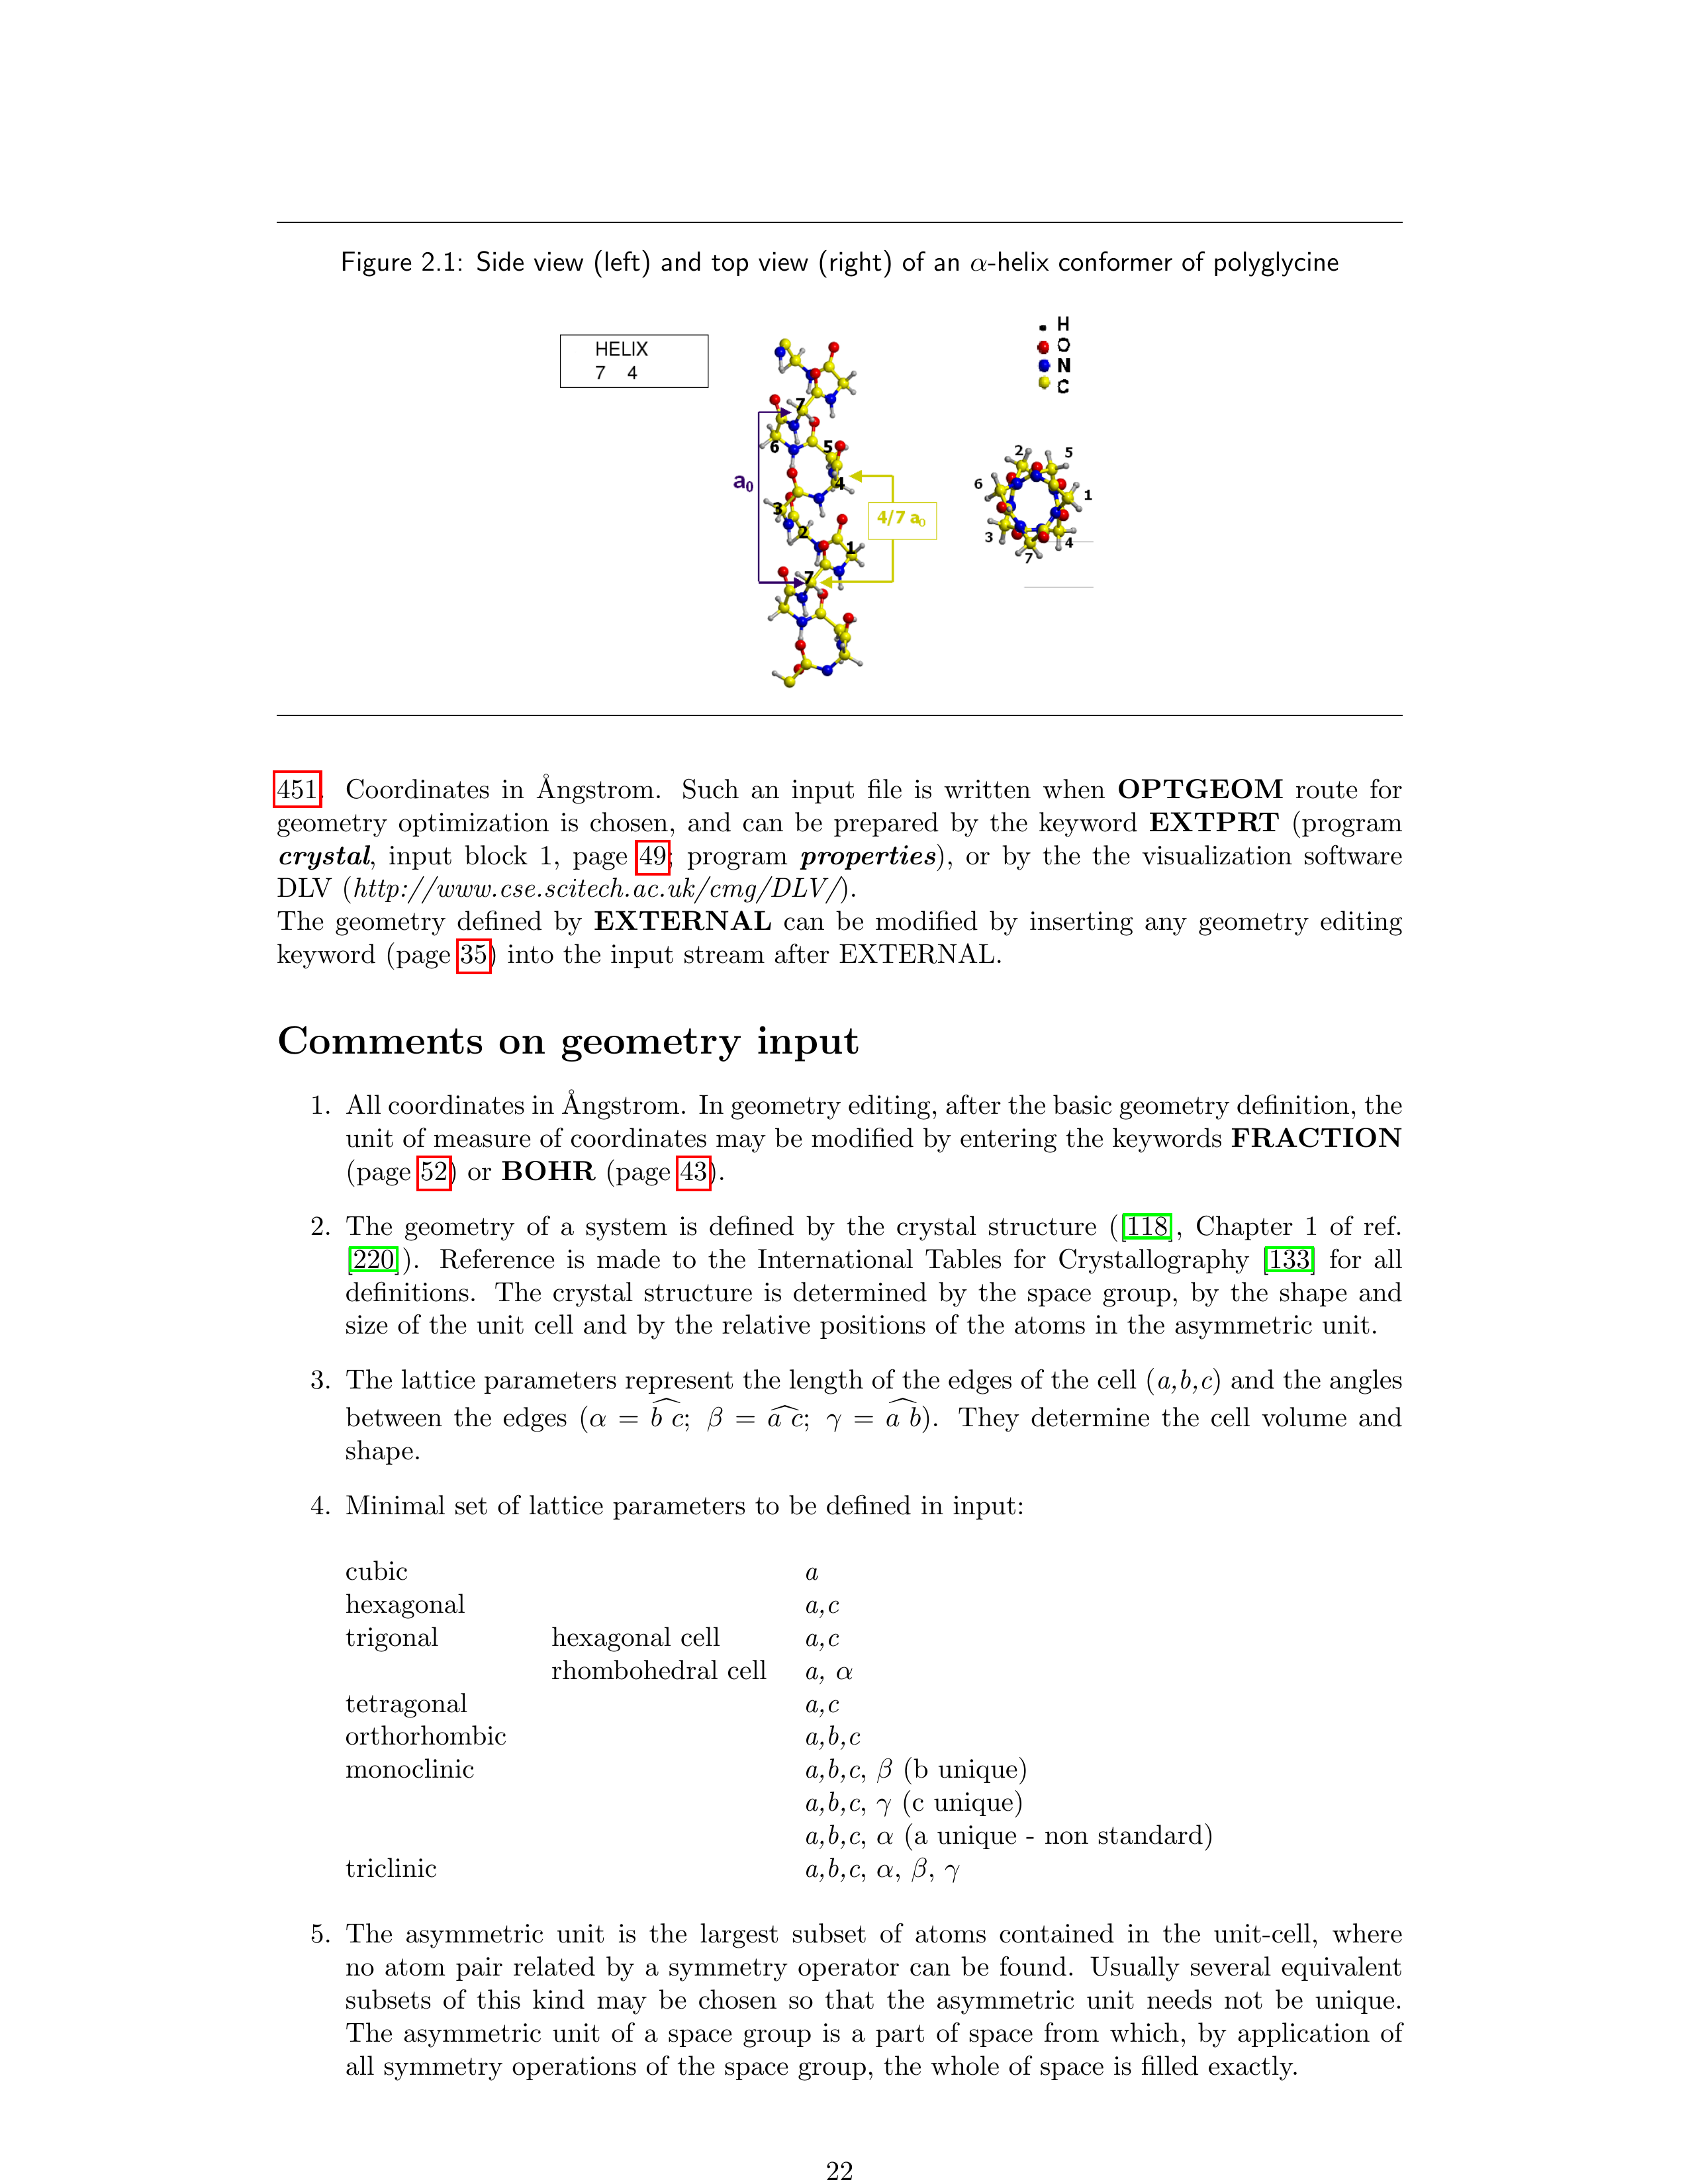

In [1]:
#conda install -c conda-forge poppler
import pdf2image 

doc_img = pdf2image.convert_from_path("crystal23.pdf", dpi=300)

# print one page as example
doc_img[21]

In [2]:
import pytesseract 
import tqdm

doc_txt = []
for page in tqdm.tqdm(doc_img):
    text = pytesseract.image_to_string(page)
    doc_txt.append(text)

doc_txt[21]

100%|██████████| 524/524 [14:35<00:00,  1.67s/it]


'Figure 2.1: Side view (left) and top view (right) of an a-helix conformer of polyglycine\n\nHELIX\n74\n\noOZ2ZoLr\n\nCoordinates in Angstrom. Such an input file is written when OPTGEOM route for\ngeometry optimization is chosen, and can be prepared by the keyword EXTPRT (program\ncrystal, input block 1, page [49} program properties), or by the the visualization software\nDLV (http://www.cse.scitech.ac.uk/cmg/DLV/).\n\nThe geometry defined by EXTERNAL can be modified by inserting any geometry editing\nkeyword (page [35) into the input stream after EXTERNAL.\n\nComments on geometry input\n\n1.\n\nAll coordinates in Angstrom. In geometry editing, after the basic geometry definition, the\nunit of measure of coordinates may be modified by entering the keywords FRACTION\n\n(page [52) or BOHR (page [43).\n\n. The geometry of a system is defined by the crystal structure ({118], Chapter 1 of ref.\n\n220]). Reference is made to the International Tables for Crystallography [133] for all\ndefinit

In [3]:
# Using the Table of Contents to tag the chapters
title_map = {
    "9-18": "Introductory Remarks",
    "19-34": "Wave Function Calculation: Basic Input Route",
    "35-132": "Wave Function Calculation: Advanced Input Route",
    "133-148": "Density Functional Methods",
    "149-164": "Semi-classical corrections for HF and DFT and composite methods (3c and sol-3c)",
    "165-186": "Spin-Orbit Coupling, Non-Collinear Magnetism, Two-Component Spinors",
    "187-211": "Geometry Optimization",
    "212-248": "Lattice Dynamics - Vibration Frequencies",
    "249-268": "Harmonic And Quasi-Harmonic Thermodynamics",
    "269-275": "Dielectric Properties up to Fourth Order via the Coupled Perturbed HF/KS Method",
    "276-281": "Tools for Studying Solid Solutions",
    "282-287": "Equations of State",
    "288-303": "Calculation of Elastic, Piezoelectric and Photoelastic Tensors",
    "304-367": "One-electron Properties and Wave-function Analysis",
    "368-372": "Running Crystal in Parallel",
    "373-393": "Input Examples",
    "394-399": "Basis Set",
    "400-417": "Theoretical Framework",
    "418-426": "Symmetry Groups",
    "427-439": "Summary of Inpput Keywords",
    "440-443": "Printing Options",
    "444-456": "External Format",
    "457-465": "Normalization Coefficients",
    "466-468": "CRYSTAL09 vs CRYSTAL06",
    "469-472": "CRYSTAL14 vs CRYSTAL09",
    "473-476": "CRYSTAL17 vs CRYSTAL14",
    "477-479": "CRYSTAL23 vs CRYSTAL17",
    "480-481": "Acronyms",
    "482-504": "Bibliography",
    "505-524": "Index"
    ""
}

lst_docs, lst_ids, lst_metadata = [], [], []
for n,page in tqdm.tqdm(enumerate(doc_txt)):
    try:
        ## get title
        title = [v for k,v in title_map.items() 
                 if n in range(int(k.split("-")[0]), 
                               int(k.split("-")[1])+1)][0]
        ## clean page
        page = page.replace("Table of Contents","")
        ## get chapter
        for i,p in enumerate(page.split('\n\n')):
            # if len(p.strip())>5:  ##<--clean paragraph
            lst_docs.append(p.strip())
            lst_ids.append(str(n)+"_"+str(i))
            lst_metadata.append({"title":title})
    except:
        continue

524it [00:00, 14962.32it/s]


In [4]:
import chromadb 
from langchain_community.embeddings import HuggingFaceEmbeddings

embedder = chromadb.utils.embedding_functions.SentenceTransformerEmbeddingFunction(model_name="all-mpnet-base-v2")

# db = chromadb.PersistentClient()
db  = chromadb.EphemeralClient()

collection_name = "crystal23"
collection = db.get_or_create_collection(name=collection_name, 
               embedding_function=embedder)

collection.add(documents=lst_docs, ids=lst_ids, metadatas=lst_metadata, embeddings=None)

collection.peek(1)

c:\Users\raysc\anaconda3\envs\chemquery\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


{'ids': ['100_0'],
 'embeddings': [[-0.030062520876526833,
   -0.04970229044556618,
   0.0029896192718297243,
   0.013178475201129913,
   -0.018162555992603302,
   -0.032905809581279755,
   0.01985931023955345,
   0.010652014054358006,
   -0.04420537129044533,
   -0.005645817145705223,
   0.01759551838040352,
   0.03569841384887695,
   -0.016409823670983315,
   0.04840341955423355,
   -0.07820257544517517,
   0.014908389188349247,
   -0.013579867780208588,
   0.014543656259775162,
   -0.03032398596405983,
   -0.054309576749801636,
   -0.010333172976970673,
   0.006790617946535349,
   -0.027461936697363853,
   -0.014058411121368408,
   -0.033291418105363846,
   -0.0010904634837061167,
   -0.01398306991904974,
   0.008711005561053753,
   0.030279144644737244,
   0.013921513222157955,
   0.03881947696208954,
   0.036029741168022156,
   -0.0073030972853302956,
   0.010934391058981419,
   1.5276309568434954e-06,
   -0.07606668770313263,
   0.015273813158273697,
   0.0609552375972271,
   0.0

In [5]:
query = "What is the VCI method?"
collection.query(query_texts=[query])

{'ids': [['245_18',
   '247_14',
   '243_0',
   '245_22',
   '245_19',
   '246_18',
   '245_26',
   '245_24',
   '247_0',
   '246_0']],
 'distances': [[0.5762231349945068,
   0.8113933801651001,
   0.8204526305198669,
   0.8814424276351929,
   0.8881375789642334,
   0.8979031443595886,
   0.9728634357452393,
   0.9801661968231201,
   0.9879375696182251,
   1.0060380697250366]],
 'metadatas': [[{'title': 'Lattice Dynamics - Vibration Frequencies'},
   {'title': 'Lattice Dynamics - Vibration Frequencies'},
   {'title': 'Lattice Dynamics - Vibration Frequencies'},
   {'title': 'Lattice Dynamics - Vibration Frequencies'},
   {'title': 'Lattice Dynamics - Vibration Frequencies'},
   {'title': 'Lattice Dynamics - Vibration Frequencies'},
   {'title': 'Lattice Dynamics - Vibration Frequencies'},
   {'title': 'Lattice Dynamics - Vibration Frequencies'},
   {'title': 'Lattice Dynamics - Vibration Frequencies'},
   {'title': 'Lattice Dynamics - Vibration Frequencies'}]],
 'embeddings': None,
 'd

In [6]:
res_db = collection.query(query_texts=[query])["documents"][0][0:10]
context = ' '.join(res_db).replace("\n", " ")
context

'VCI: Theoretical Remarks and Options The results of the VCI calculation are printed in the output file below this header: 8.12.2. The VSCF and VCI Approaches where the sum runs over Neon¢ configurations, each characterized by a vibrational configuration vector n. The selection of the Nong configurations determines the truncation of the VCI expansion. For each vibrational state s, the corresponding VCI wave-function and energy are obtained by solving the corresponding Schrodinger equation HV, = E,W,. The VCI method can be expressed in matrix form as follows: HA = AE, where A is the squared matrix containing, column-wise, the coefficients A,,, of the eigenvectors, E is the diagonal matrix of the eigenvalues and H is the VCI Hamiltonian matrix (of size Neont X Nconr), whose elements are: In the VCI method, the wave-function of each vibrational state s is written as a linear combi- nation of M-mode wave-functions of different vibrational configurations in the form of Hartree products of m

In [14]:
import ollama

# Chat with Context only
res = ollama.chat(model="mistral", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using only \
                                                         the folling information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

 The VCI (Vibrational Configuration Interaction) method is a quantum chemical computational approach used to calculate the vibrational states of a molecule. It does this by expanding the wavefunction of each vibrational state as a linear combination of Hartree products of modal functions, where each modal function corresponds to a normal mode of the molecule.

The VCI method involves constructing and diagonalizing a Hamiltonian matrix (of size Neont X Nconr), where Neon is the number of neon configurations and Nconr is the number of correlation modes. The elements of this matrix are derived from the vibrational configuration vector n, which characterizes each neon configuration, and the VCI Hamiltonian operator H.

The method can be improved by using solutions from a VSCF (Second Order Perturbation Theory for Vibrations) calculation as an initial guess for the VCI treatment. This is known as the VCI@VSCF approach. Additionally, strategies for truncating the VCI expansion have been impl

In [15]:
# Chat with knowledge + Context
res = ollama.chat(model="mistral", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

 The VCI (Vibrational Configuration Interaction) method is a quantum chemistry computational technique used to calculate the energies and wavefunctions of molecular vibrational states. It's an extension of the Configuration Interaction (CI) method, specifically designed for treating vibrational problems in molecular systems.

The VCI method involves solving the corresponding Schrodinger equation for each vibrational state, using a Hamiltonian matrix that contains elements derived from the eigenvectors and eigenvalues of the problem. The wavefunction of each vibrational state is written as a linear combination of multiple-mode wavefunctions of different vibrational configurations, in the form of Hartree products of modals.

The VCI method reduces to the construction and diagonalization of the VCI Hamiltonian matrix, from which all vibrational states are simultaneously determined. The method can be improved by using solutions from a lower level of theory (such as VSCF solutions) as an in